In [ ]:
#Evaluation 3

In [1]:
#Primero se utilizaran los mapas del trabajo anterior

In [2]:
import os

import geopandas as gpd
from  fiona import listlayers

#maps
romaniaMaps='https://github.com/Clases-y-Evaluaciones-DelaCruz-Diana/Evaluation3-DelaCruz/raw/main/maps/romaniaMaps_3844.gpkg'

#layers in maps
listlayers(romaniaMaps)

['countries', 'cities', 'rivers']

In [3]:
romania=gpd.read_file(romaniaMaps,layer='countries')
romania_cities=gpd.read_file(romaniaMaps,layer='cities')
romania_rivers=gpd.read_file(romaniaMaps,layer='rivers') 

In [4]:
romania.crs.to_epsg()==romania_cities.crs.to_epsg()==romania_rivers.crs.to_epsg()

True

<Axes: >

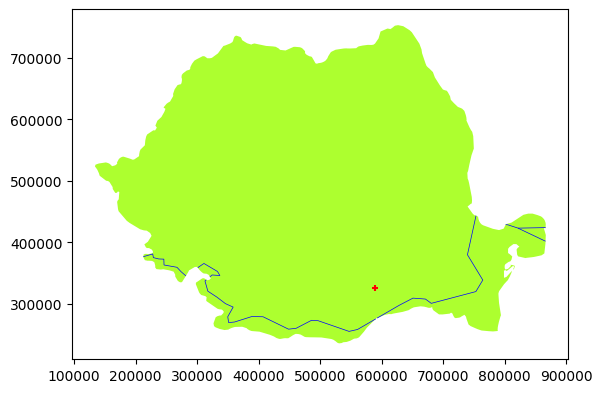

In [5]:
base = romania.plot(facecolor="greenyellow")
romania_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
romania_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [6]:
#Formating Geoseries projections

In [7]:
romania

,COUNTRY,geometry
0,Romania,"POLYGON ((314874.819 305425.196, 315538.064 31..."


In [8]:
romania.boundary

0    LINESTRING (314874.819 305425.196, 315538.064 ...
dtype: geometry

<Axes: >

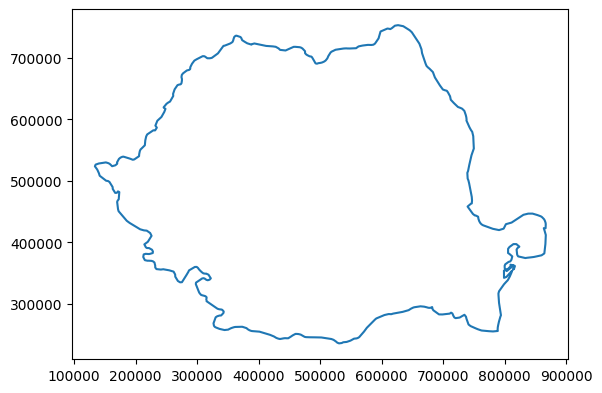

In [9]:
romania.boundary.plot()

In [10]:
type(romania.boundary)

geopandas.geoseries.GeoSeries

In [11]:
# convirtiendo a GDF
romania.boundary.to_frame()

,0
0,"LINESTRING (314874.819 305425.196, 315538.064 ..."


In [12]:
# conversion
romania_border=romania.boundary.to_frame() 

# new column (optional)
romania_border['name']='Romania' 

# renaming the geometry column
romania_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
#cuando se coloca el set_geometry se debe colocar en comillas el nombre de la geometria
romania_border = romania_border.set_geometry("geometry")

# verifying:
romania_border.crs

<Projected CRS: EPSG:3844>
Name: Pulkovo 1942(58) / Stereo70
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Romania - onshore and offshore.
- bounds: (20.26, 43.44, 31.41, 48.27)
Coordinate Operation:
- name: Stereo 70
- method: Oblique Stereographic
Datum: Pulkovo 1942(58)
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

In [13]:
romania_border

,geometry,name
0,"LINESTRING (314874.819 305425.196, 315538.064 ...",Romania


In [ ]:
#Lacking CRS information

In [14]:
romania_states=gpd.read_file(os.path.join("maps","rou_adm_ancpi_v02_20220427_ab_shp","rou_admbnda_adm1_ancpi_v02_20220427.shp"))
romania_municipalities=gpd.read_file(os.path.join("maps","rou_adm_ancpi_v02_20220427_ab_shp","rou_admbnda_adm2_ancpi_v02_20220427.shp"))

In [15]:
romania_states.crs, romania_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

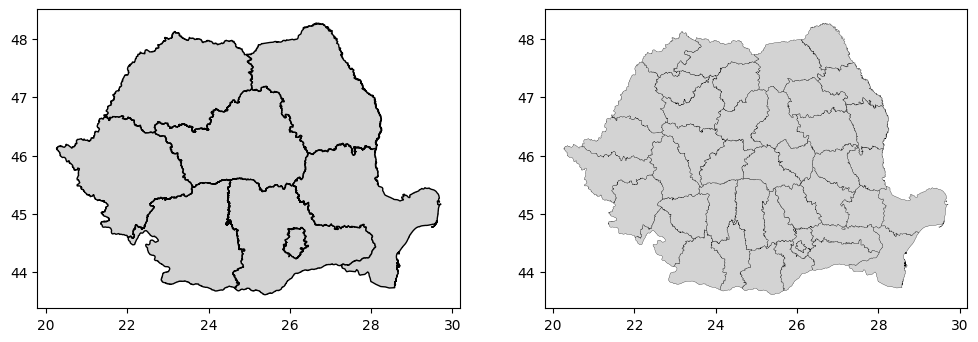

In [16]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

romania_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
romania_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [17]:
romania_states.geometry.head()

0    POLYGON ((26.30330 44.76770, 26.30480 44.76650...
1    MULTIPOLYGON (((23.66380 46.41530, 23.66390 46...
2    POLYGON ((26.70020 48.26540, 26.70190 48.26520...
3    MULTIPOLYGON (((23.63000 46.40440, 23.63010 46...
4    POLYGON ((24.75190 44.42570, 24.75190 44.42560...
Name: geometry, dtype: geometry

In [19]:
romania_states.crs = "EPSG:3844"
romania_municipalities.crs = "EPSG:3844"

In [20]:
romania_states=romania_states.to_crs(3844)
romania_municipalities=romania_municipalities.to_crs(3844)

In [ ]:
#Projecting Lat/Lon Points

In [21]:
import pandas as pd 

infoairports=pd.read_csv(os.path.join("data","ro-airports.csv"))

infoairports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,4482,LROP,large_airport,Henri Coandă International Airport,44.571111,26.085,314,EU,Romania,RO,...,Bucharest,1,LROP,OTP,NaN,http://www.bucharestairports.ro/en/,https://en.wikipedia.org/wiki/Henri_Coand%C4%8...,"BUH, Otopeni Airport, RoAF 90th Airlift Base",1675,2022-04-11T16:52:19+00:00
2,4474,LRBS,medium_airport,Băneasa International Airport,44.503201,26.1021,297,EU,Romania,RO,...,Bucharest,1,LRBS,BBU,NaN,http://www.baneasa-airport.ro/,https://en.wikipedia.org/wiki/Aurel_Vlaicu_Int...,"BUH, Aurel Vlaicu International Airport",750,2023-09-19T07:01:28+00:00
3,4476,LRCL,medium_airport,Cluj-Napoca International Airport,46.785198,23.686199,1039,EU,Romania,RO,...,Cluj-Napoca,1,LRCL,CLJ,NaN,http://www.airportcluj.ro/,https://en.wikipedia.org/wiki/Cluj-Napoca_Inte...,Someşeni Airport,750,2020-01-14T01:41:36+00:00
4,4488,LRTR,medium_airport,Timişoara Traian Vuia Airport,45.809898376464844,21.337900161743164,348,EU,Romania,RO,...,Timişoara,1,LRTR,TSR,NaN,http://www.aerotim.ro/,https://en.wikipedia.org/wiki/Traian_Vuia_Inte...,"RoAF 93rd Air Base, Giarmata Airport, Temesvár...",750,2008-06-13T14:30:04+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,324127,LRBG,heliport,IAR Ghimbav Heliport,45.6873,25.527073,1762,EU,Romania,RO,...,Ghimbav,0,LRBG,NaN,NaN,NaN,NaN,Mir Aero,0,2022-01-12T17:23:23+00:00
99,351103,RO-0040,heliport,Năvodari Heliport,44.32903,28.65699,1,EU,Romania,RO,...,Năvodari,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-12-30T15:01:57+00:00
100,354769,LRCC,heliport,Oituz Heliport,46.21056,26.60278,1094,EU,Romania,RO,...,Oituz,0,LRCC,NaN,NaN,NaN,NaN,NaN,0,2022-06-04T06:33:20+00:00
101,351076,RO-0035,heliport,Caragea Dermen Heliport,44.23193,28.58523,30,EU,Romania,RO,...,Ovidiu,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-12-30T11:04:14+00:00


In [22]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           102 non-null    object
 1   type           102 non-null    object
 2   latitude_deg   102 non-null    object
 3   longitude_deg  102 non-null    object
 4   elevation_ft   71 non-null     object
 5   region_name    102 non-null    object
 6   municipality   80 non-null     object
dtypes: object(7)
memory usage: 5.7+ KB


In [23]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info() #tienen que salir numeros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           102 non-null    object 
 1   type           102 non-null    object 
 2   latitude_deg   102 non-null    float64
 3   longitude_deg  102 non-null    float64
 4   elevation_ft   71 non-null     float64
 5   region_name    102 non-null    object 
 6   municipality   80 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.7+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

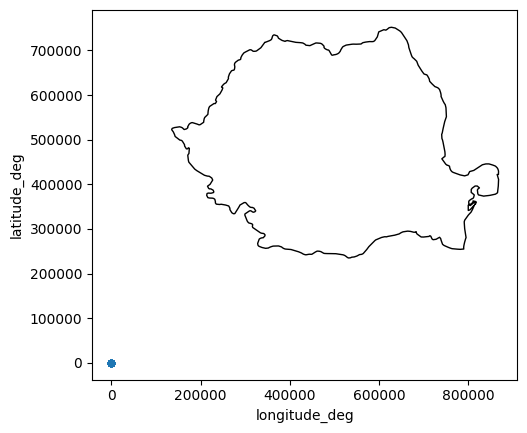

In [24]:
# let's plot

base = romania.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [ ]:
#No proyectado

In [25]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)# the coordinates were in degrees - unprojected cuando es longitud latitud

In [ ]:
#Proyectado

In [26]:
airports=airports.to_crs(3844)#cambiar crs para proyectarlo

<Axes: >

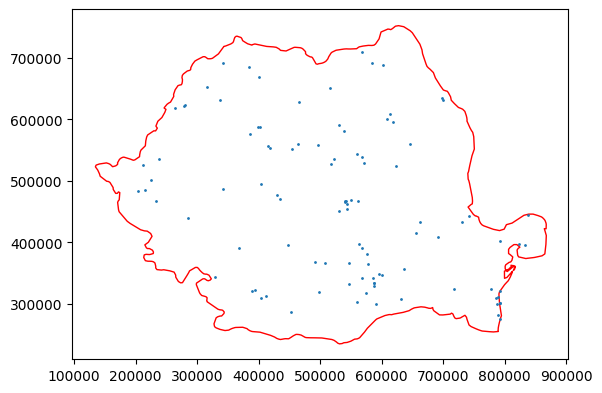

In [27]:
base = romania.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [28]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [29]:
airports['type'].value_counts()

type
small_airport     59
medium_airport    21
heliport          17
closed             4
large_airport      1
Name: count, dtype: int64

In [30]:
airports.rename(columns={'type':'kind'},inplace=True)

In [36]:
from folium import LayerControl


m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
#m = airports[airports.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports[airports.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports[airports.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [ ]:
#Combing GeoDF rows